<a href="https://colab.research.google.com/github/SangHyeok-Lee1227/petitions/blob/master/oracleSr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
# 구글 파일 연동
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# 한글을 좀 더 선명하게 보여줌
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")# 한글을 좀 더 선명하게 보여줌
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [ ]:
df = pd.read_csv("Oracle_SR.csv")
df.head()

,순번,요청사,업무부문,요청자,담당자,SR Name,내용,진행경과,SR Number,Severity,SR 상태,Close 유형,SR 유형,최초 등록일,완료일
0,1,KAS,재무부문,심현석,박성현,[KAS]It does not match the action approved tim...,Ap approval history에 시간표시 오류,1) AP Approval History의 결재 순서가 순차적으로 보이지 않음\n2...,3-19363897051,2-Significant,Closed,수용 불가,오류,2019-02-10,2019-07-05
1,2,KAS,재무부문,심현석,박성현,[KAS]Approval history is abnormally displayed ...,Notification화면에서 approval history가 정상적으로 보이지않음,1) Notification의 History가 보이지 않는 경우 발생\n2) Ora...,3-19333601021,4-Significant,Closed,재현 불가,오류,2019-02-03,2019-07-09
2,3,KAS,재무부문,심현석,박성현,[KAS]What is the file attachment display order...,Notification화면에서 첨부파일이 보여지는 순서,1) 화면이 첨부순서가 Notification에서서 재 정렬됨.\n2) Oracle...,3-19468178691,2-Significant,Closed,ER,오류,2019-02-21,2019-07-09
3,4,KAS,재무부문,심현석,박성현,[KAS] AP email noti screen shows only 9 costce...,email noti화면에서 costcenter summary가 9개만 보이는 현상,1) E-mail Notificaton에서서 Cose Center가 9까지만 보이는...,3-19113469681,1-Critical,Closed,수용 불가,오류,2019-02-01,2019-07-05
4,5,KAS,재무부문,심현석,박성현,[KAS]We need detailed description of each task...,Worklist화면에 inbox의 디테일 설명요청,1) WorkList의 inbox의 상세 기능 설명 요청\n2) Oracle로 부터...,3-19490222091,2-Significant,Closed,Auto Close,오류,2019-03-04,2019-06-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,220,공통,재무부문,공통,박성현,"In GL, Attaching URLs Errors Out, Saying 'The ...",GL에서 20B Upgrade 이후 Invoice/Expense URL 첨부 에러 ...,1) GL에서 20B Upgrade 이후 Invoice/Expense URL 첨부 ...,3-23430781481,1-Critical,In Progress,NaN,오류,2020.06.29,NaN
218,221,공통,재무부문,공통,박성현,"In Expense, Attaching URLs Errors Out, Saying ...",Expense에서 20B Upgrade 이후 Invoice/Expense URL 첨...,1) Expense에서 20B Upgrade 이후 Invoice/Expense UR...,3-23431146391,1-Critical,In Progress,NaN,오류,2020.06.29,NaN
219,222,JINAIR,재무부문,김민지B,박성현,Workflow Approved Invoices Start Proceeding Ap...,회계팀 결재완료된 Invoice가 다시 결재 상신 되는 이슈,1) 회계팀 결재가 완료되어 승인이 완료된 Invoice가 다시 결재가 진행되는 이...,3-23498332361,2-Critical,In Progress,NaN,오류,2020.07.07,NaN
220,223,KAS,재무부문,류명기,박성현,Need to Purge Obsolete Workflow Notifications ...,오래된 Workflow Notification 삭제 요청,1) BPM Workflow 리스트에 오래전에 보내진 Notification이 아직...,3-23510869891,2-Critical,In Progress,NaN,오류,2020.07.08,NaN


In [ ]:
import numpy as np
df.columns
df_part = df[['순번','요청사','업무부문','담당자','진행경과','SR 상태','Close 유형','SR 유형','최초 등록일','완료일']]
df_part['개수'] = df_part['순번'].value_counts().copy()
df_part['개수'].fillna(1)
df_part

,순번,요청사,업무부문,담당자,진행경과,SR 상태,Close 유형,SR 유형,최초 등록일,완료일,개수
0,1,KAS,재무부문,박성현,1) AP Approval History의 결재 순서가 순차적으로 보이지 않음\n2...,Closed,수용 불가,오류,2019-02-10,2019-07-05,NaN
1,2,KAS,재무부문,박성현,1) Notification의 History가 보이지 않는 경우 발생\n2) Ora...,Closed,재현 불가,오류,2019-02-03,2019-07-09,1.0
2,3,KAS,재무부문,박성현,1) 화면이 첨부순서가 Notification에서서 재 정렬됨.\n2) Oracle...,Closed,ER,오류,2019-02-21,2019-07-09,1.0
3,4,KAS,재무부문,박성현,1) E-mail Notificaton에서서 Cose Center가 9까지만 보이는...,Closed,수용 불가,오류,2019-02-01,2019-07-05,1.0
4,5,KAS,재무부문,박성현,1) WorkList의 inbox의 상세 기능 설명 요청\n2) Oracle로 부터...,Closed,Auto Close,오류,2019-03-04,2019-06-27,1.0
...,...,...,...,...,...,...,...,...,...,...,...
217,220,공통,재무부문,박성현,1) GL에서 20B Upgrade 이후 Invoice/Expense URL 첨부 ...,In Progress,NaN,오류,2020.06.29,NaN,1.0
218,221,공통,재무부문,박성현,1) Expense에서 20B Upgrade 이후 Invoice/Expense UR...,In Progress,NaN,오류,2020.06.29,NaN,1.0
219,222,JINAIR,재무부문,박성현,1) 회계팀 결재가 완료되어 승인이 완료된 Invoice가 다시 결재가 진행되는 이...,In Progress,NaN,오류,2020.07.07,NaN,1.0
220,223,KAS,재무부문,박성현,1) BPM Workflow 리스트에 오래전에 보내진 Notification이 아직...,In Progress,NaN,오류,2020.07.08,NaN,1.0


In [ ]:
df_gb = pd.DataFrame(df_part.groupby(by=['업무부문','Close 유형'])['최초 등록일'].count().reset_index())
df_gb = df_gb.rename(columns = {'최초 등록일' : '개수'})
df_gb

,업무부문,Close 유형,개수
0,공통,ER,1
1,공통,Patch 제공,1
2,공통,Solution 제공,9
3,공통,수용 불가,1
4,공통,재현 불가,1
5,구매부문,Solution 제공,7
6,구매부문,재현 불가,3
7,기준정보,Bug 등록,2
8,기준정보,Patch 제공,1
9,기준정보,Solution 제공,2


In [ ]:
df_gb.pivot(index='업무부문', columns='Close 유형', values='개수')

Close 유형,Auto Close,Bug 등록,ER,Human Error,Patch 제공,Solution 제공,수용 불가,재현 불가
업무부문,,,,,,,,
공통,NaN,NaN,1.0,NaN,1.0,9.0,1.0,1.0
구매부문,NaN,NaN,NaN,NaN,NaN,7.0,NaN,3.0
기준정보,NaN,2.0,NaN,NaN,1.0,2.0,NaN,1.0
인사정보,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
재고부문,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN
재무부문,6.0,7.0,13.0,NaN,5.0,113.0,7.0,13.0


In [ ]:
df3 = pd.read_csv("oracleSr1.csv", encoding='cp949')
df4 = pd.read_csv("oracleSr2.csv", encoding='cp949')
df4


,발생월,유형,SR개수(월),SR개수(누적)
0,2019.06,발생,18,18
1,2019.06,해결,4,4
2,2019.07,발생,17,35
3,2019.07,해결,13,17
4,2019.08,발생,9,44
5,2019.08,해결,13,30
6,2019.09,발생,13,57
7,2019.09,해결,13,43
8,2019.10,발생,11,68
9,2019.10,해결,6,49


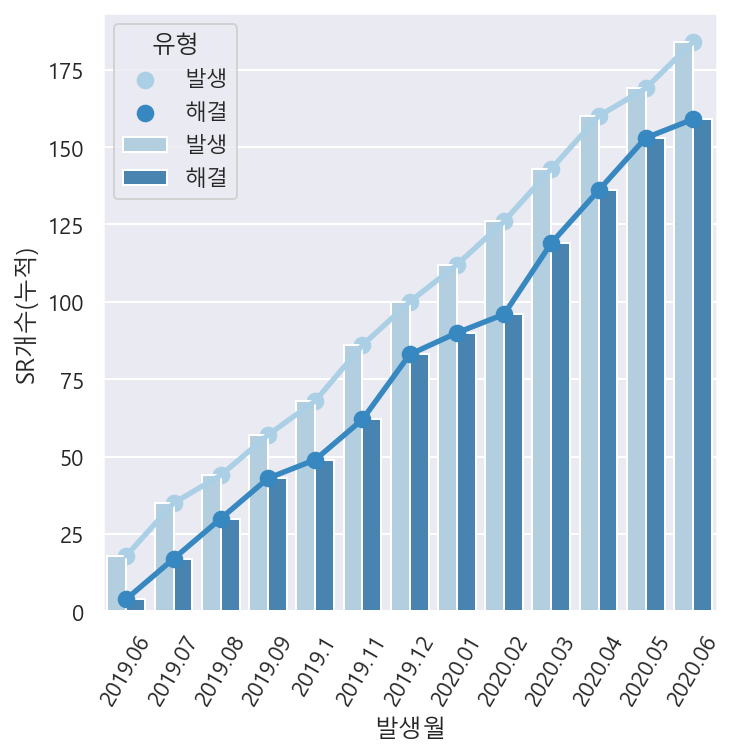

In [ ]:
import matplotlib.pyplot as plt
sns.set(font="Malgun Gothic")
plt.figure(figsize=(5.5,5.5)) # 그래프 표시 점 늘리기 
plt.xticks(rotation=60)    # x축 글자 기울임 조정
# plt.title("Orace SR 발생/해결")
sns.pointplot(data=df3, x="발생월", y="SR개수",hue="유형", palette="Blues" )

sns.barplot(data=df4, x="발생월", y="SR개수(누적)",hue="유형", palette="Blues" )

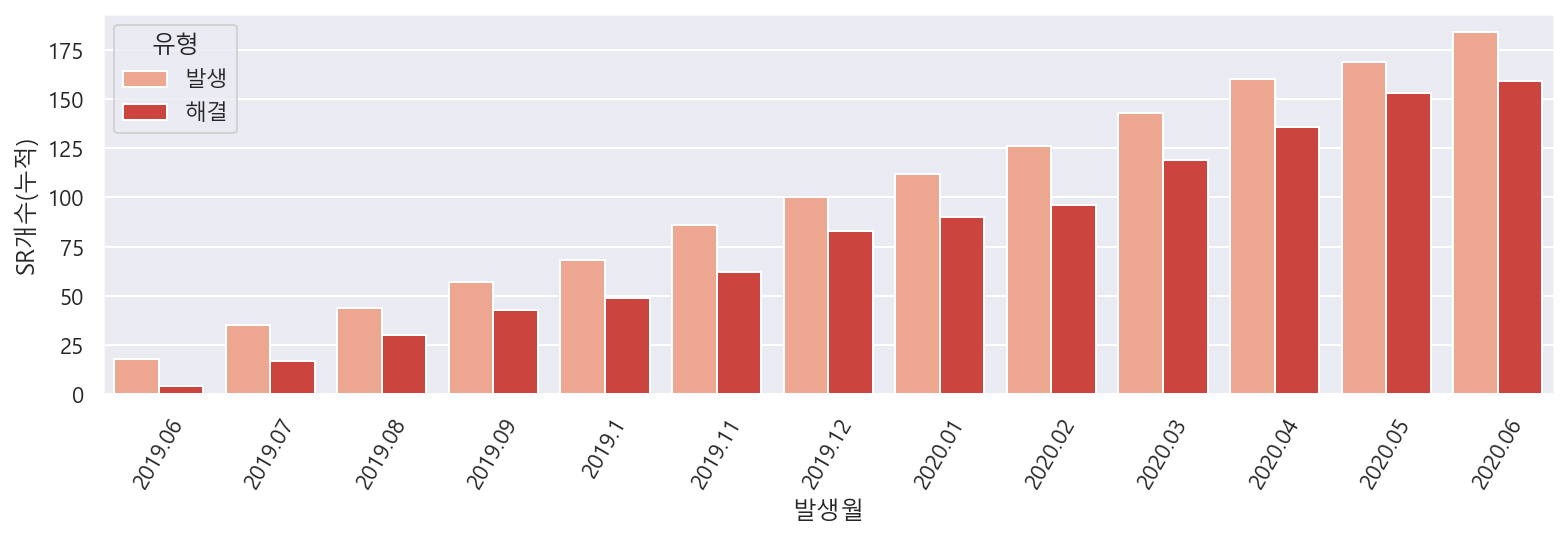

In [ ]:
df4 = pd.read_csv("oracleSr2.csv", encoding='cp949')
df4
sns.set(font="Malgun Gothic")
plt.figure(figsize=(13,3.5)) # 그래프 표시 점 늘리기 
plt.xticks(rotation=60)    # x축 글자 기울임 조정
# plt.title("Orace SR 발생/해결")
sns.barplot(data=df4, x="발생월", y="SR개수(누적)",hue="유형", palette="Reds" )

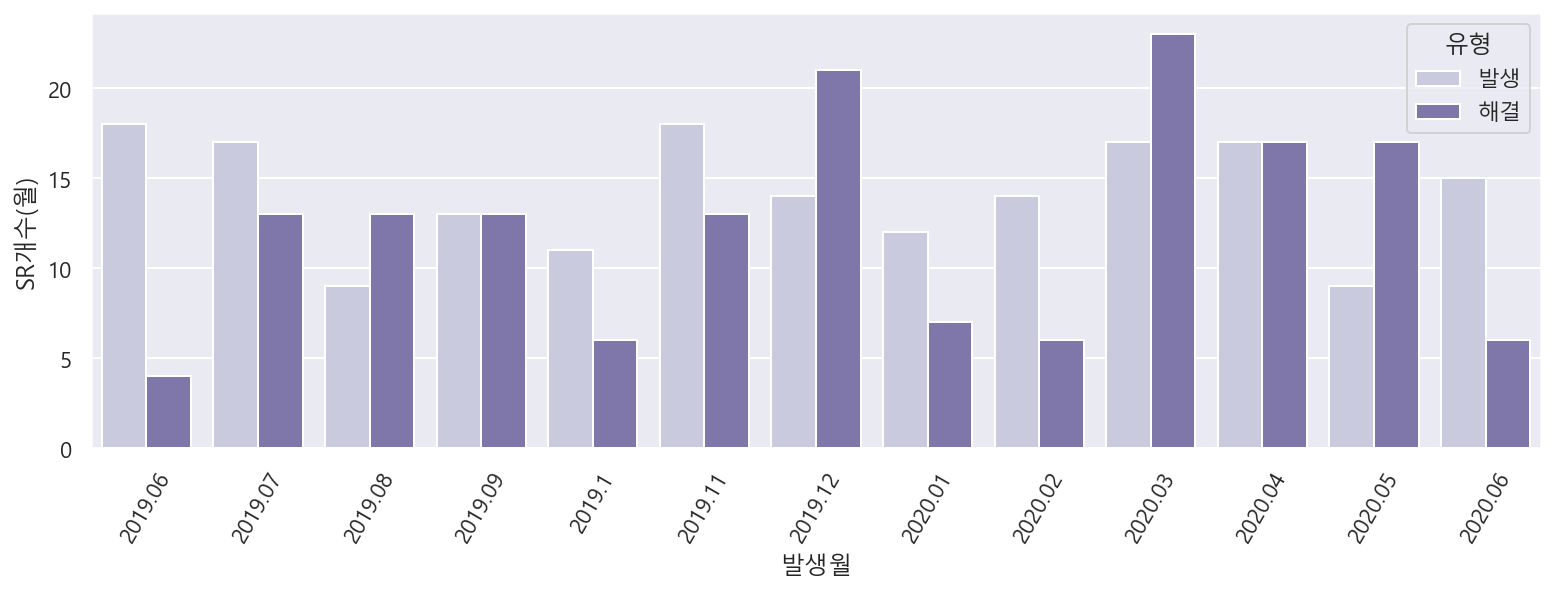

In [ ]:
sns.set(font="Malgun Gothic")
plt.figure(figsize=(13,4)) # 그래프 표시 점 늘리기 
plt.xticks(rotation=60)    # x축 글자 기울임 조정
# plt.title("Orace SR 발생/해결")
sns.barplot(data=df4, x="발생월", y="SR개수(월)",hue="유형", palette="Purples")

In [ ]:
df3.head()

,발생월,유형,SR개수
0,2019.06,발생,18
1,2019.06,해결,4
2,2019.07,발생,35
3,2019.07,해결,17
4,2019.08,발생,44


In [ ]:
df_cr = df3.pivot(index="발생월", columns="유형", values="SR개수").reset_index()
df_cr

유형,발생월,발생,해결
0,2019.06,18,4
1,2019.07,35,17
2,2019.08,44,30
3,2019.09,57,43
4,2019.10,68,49
5,2019.11,86,62
6,2019.12,100,83
7,2020.01,112,90
8,2020.02,126,96
9,2020.03,143,119


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.rc("font", family="Malgun Gothic")

%matplotlib inline

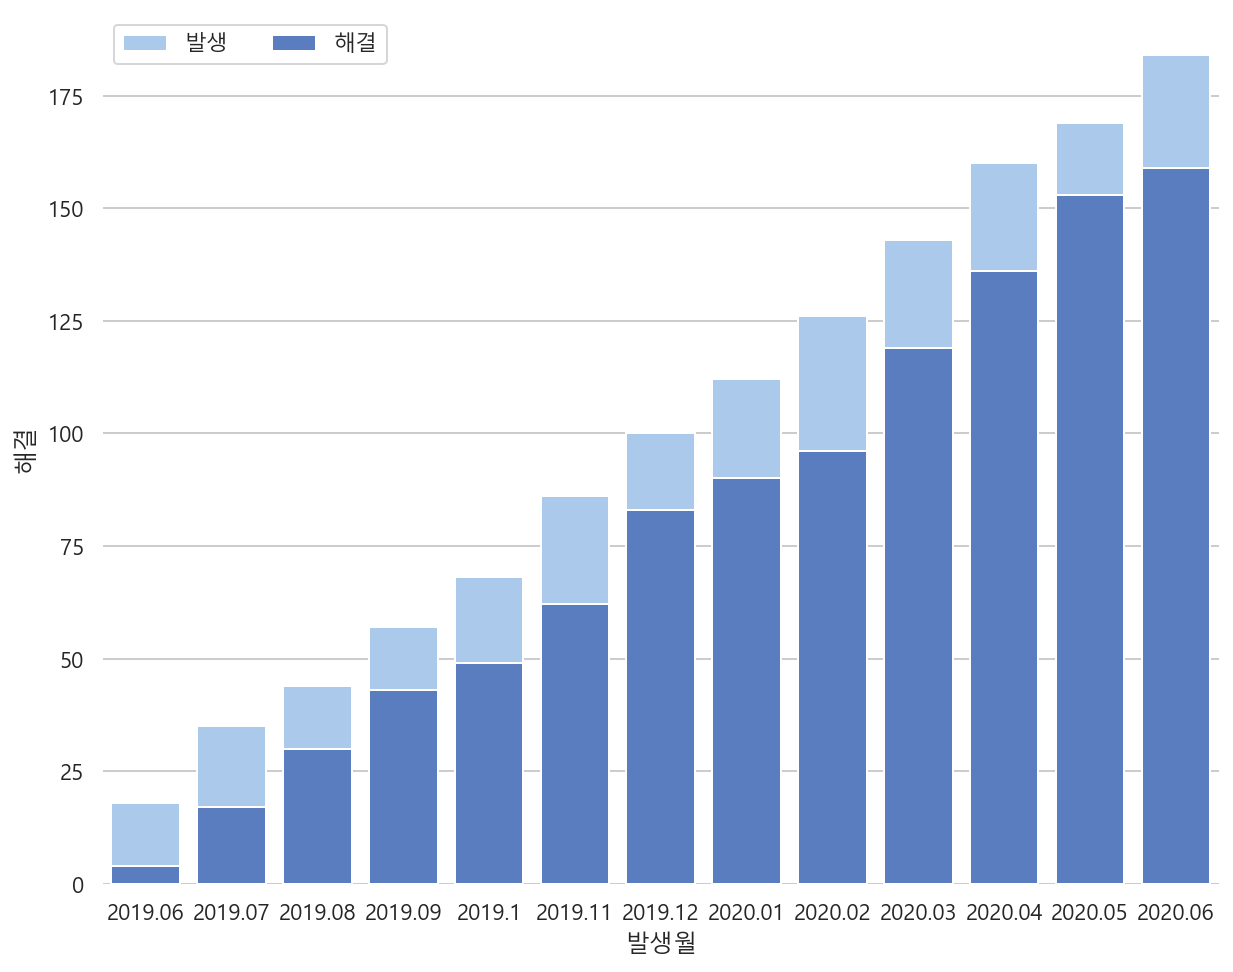

In [ ]:
plt.figure(figsize=(10,8))
sns.set_color_codes("pastel")
sns.barplot(x="발생월", y="발생", data=df_cr, color="b", label="발생")

sns.set_color_codes("muted")
sns.barplot(x="발생월", y="해결", data=df_cr, color="b", label="해결")
sns.despine(left=True, bottom=True)

plt.legend(ncol=4, loc="middle left", frameon=True)

In [ ]:
df_d = pd.read_csv("SR처리일수.csv")
df_d.describe()
df_d = df_d.sort_values("DAY")
df_d = df_d[df_d["DAY"] < 250]

In [ ]:
# 한글 폰트가 깨지는 것을 방지
plt.rc("font", family = 'Malgun Gothic')
# - 기호가 깨지는 것을 막아주기위해서 넣어준다. 
plt.rc("axes", unicode_minus=False)# 한글 폰트가 깨지는 것을 방지
plt.rc("font", family = 'Malgun Gothic')
# - 기호가 깨지는 것을 막아주기위해서 넣어준다. 
plt.rc("axes", unicode_minus=False)

plt.figure(figsize=(6,6))
# sns.set_color_codes("pastel")
sns.distplot(df_d["DAY"], kde = True, kde_kws = {'linewidth': 3, 'shade':True}, bins=50)
plt.xlabel('처리일수')
plt.ylabel('개수')


In [ ]:
from scipy import stats                # 통계를 위한 라이브러리
import numpy as np                     # x 범위 설정을 위한 라이브러리
import matplotlib.pyplot as plt        # 플롯 작성을 위한 라이브러리

# 한글을 좀 더 선명하게 보여줌
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")# 한글을 좀 더 선명하게 보여줌
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

%matplotlib inline

# plt.hist(rand, density=True, histtype='stepfilled', bins=20, alpha=.2, label='random freqency')

# plt.hist(df_d)

# plt.plot(df_d, 'b--', lw=2, label='normal distribution')
# plt.hist(df_d, bins=20, normed=True)
# plt.hist(df_d,  histtype='stepfilled', bins=30, alpha=.5, label='random freqency')
plt.figure(figsize=(10,7))
# sns.set_color_codes("pastel")
sns.distplot(df_d, kde = True, kde_kws = {'linewidth': 3})